# Project: Investigate a Dataset - [No-show appointments]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

>This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row. 
Features in the dataset are:  
● ‘PatientId’ is a unique ID for each patient.    
● ‘AppointmentID’ is a unique ID for each appointment.  
● ‘Gender’ is the gender of each patient.  
● ‘AppointmentDay’ tells us on what day the patient had their appointment.     
● ‘Age’  
● ‘Hipertension’ is the hypertensive status of each patient.  
● ‘Diabetes’ is the diabetic status of each patient.  
● ‘Alcoholism’ is the alocholic status of each patient.  
● ‘Handcap’ is the physical status of each patient.  
● ‘SMS_received’ tells us whether or not the patient has received a SMS.  
● ‘ScheduledDay’ tells us on what day the patient set up their appointment.     
● ‘Neighborhood’ indicates the location of the hospital.     
● ‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.     
● ‘No-show’ tells us whether patients showed or not. It says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.


### Question(s) for Analysis
>Is there a difference in the distribution (or counts) between patients who showed and did not show which could point at factors influencing show-up rate?

 

In [3]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html

%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [4]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv("noshowappointments-kagglev2-may-2016.csv")
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [5]:
# Find the number of instances (rows) and features (columns)
df.shape

(110527, 14)

>There are 110527 instances and 14 features in this dataset.

In [6]:
# Check for missing data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


>There is no missing data.

In [7]:
# Check for duplicates 
df.duplicated().sum(), df["PatientId"].duplicated().sum(),df["AppointmentID"].duplicated().sum()

(0, 48228, 0)

>Threre are no duplicates, however some patients (48228) had more than one appointment. 

In [8]:
# Get descriptive summary statistics for different features 
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [9]:
# Get descriptive summary statistics for different features
df['Neighbourhood'].value_counts()

JARDIM CAMBURI                 7717
MARIA ORTIZ                    5805
RESISTÊNCIA                    4431
JARDIM DA PENHA                3877
ITARARÉ                        3514
                               ... 
ILHA DO BOI                      35
ILHA DO FRADE                    10
AEROPORTO                         8
ILHAS OCEÂNICAS DE TRINDADE       2
PARQUE INDUSTRIAL                 1
Name: Neighbourhood, Length: 81, dtype: int64

In [10]:
# Get descriptive summary statistics for different features
df['No-show'].value_counts()

No     88208
Yes    22319
Name: No-show, dtype: int64

>- Threre could be some wrong entry data e.g.,age and there are errors in column names e.g., Hipertension and Handcap.
>- Most patients are between 20 and 60 years old.
>- Most patinets do not suffer from hypertension or diabetes.
>- Most patients are not alcoholic or handicapped. 
>- Most patients are not included in the scholarshipe program.
>- Most patients did not receive an SMS.
>- Most patients were appointed to JARDIM CAMBURI hospital.
>- Most patients showed for their appointment. 

In [12]:
# Check for wrong entry data in age column
df.query('Age=="-1"')

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show


> There is one instance with wrong entry in age column. 


### Data Cleaning 

In [13]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.

# Drop the instance wiht the incorrect age value
df.drop(df[df.Age == -1].index,inplace=True)

# Rename columns
df.rename(columns={'Hipertension': 'Hypertension', 'Handcap': 'Handicap','No-show':'No_show'},inplace=True)

# Drop unnecessay features (columns)
df.drop(['PatientId','AppointmentID','ScheduledDay','AppointmentDay'], axis=1, inplace=True)

df.head()


,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


> Data is cleaned as follows:
- Removal of wrong entry instances.
- Removal of non-informative features.
- Columns have been renamed.

<a id='eda'></a>
## Exploratory Data Analysis


### Question1. What is the distribution of different features in the whole dataset?

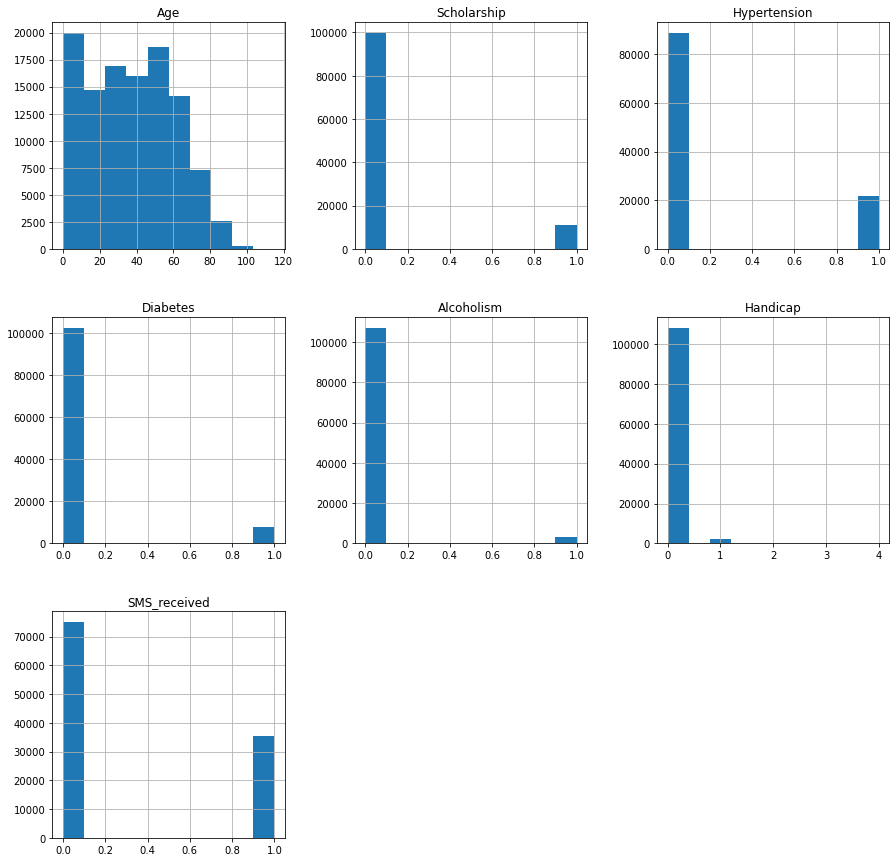

In [14]:
# Explore the dirstribution of different features of the whole dataset
df.hist(figsize=(15,15));




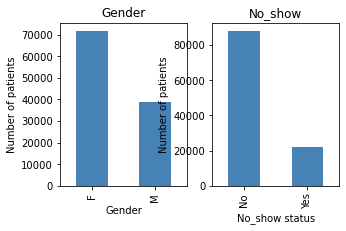

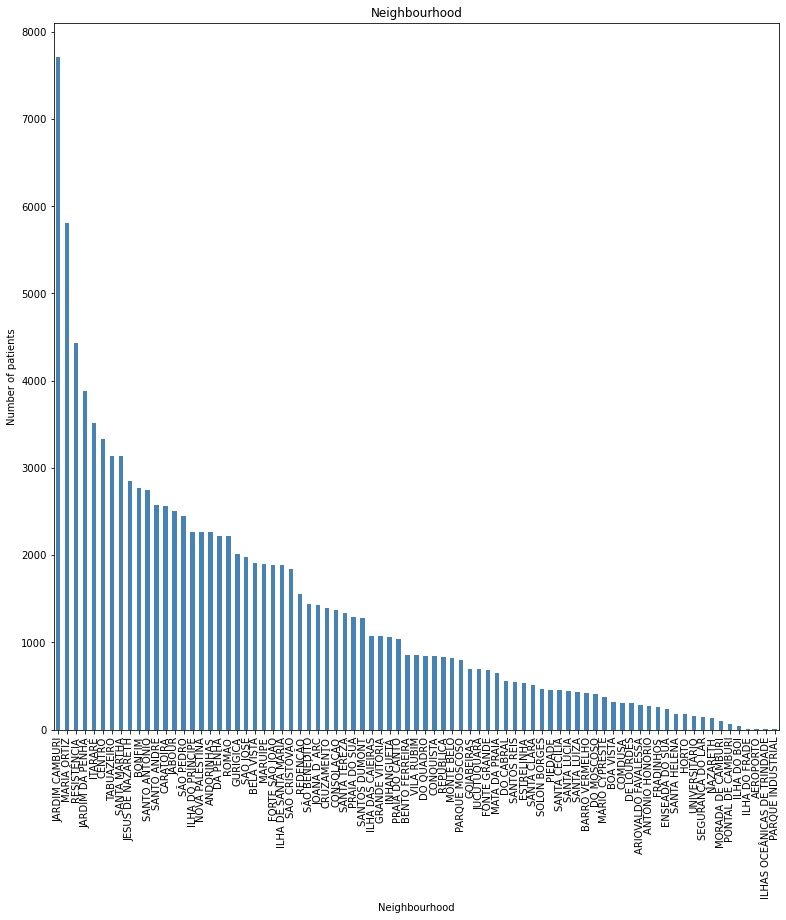

In [15]:
# Explore the dirstribution of different features of the whole dataset
plt.figure(figsize=(5,3))

plt.subplot(121)
df['Gender'].value_counts().plot(kind='bar',title='Gender',color='steelblue')
plt.xlabel('Gender')
plt.ylabel('Number of patients');

plt.subplot(122)
df['No_show'].value_counts().plot(kind='bar',title='No_show',color='steelblue')
plt.xlabel('No_show status')
plt.ylabel('Number of patients');


plt.figure(figsize=(13,13))
df['Neighbourhood'].value_counts().plot(kind='bar',title='Neighbourhood', color='steelblue')
plt.xlabel('Neighbourhood')
plt.ylabel('Number of patients');

> Histograms show similar observations as summmary statistics. 

### Question 2. Is there a difference in the features distribution (or counts) between patients who showed and did not show?

In [16]:
# Split the dataset into two depending on the 'No_show' status
show = df[df['No_show']=='No']
noshow = df[df['No_show']=='Yes']

In [17]:
# Get descriptive summary statistics for different features for both datasets
print("Descriptive statistics of patients showed")
print('\n')
      
print(show.describe())
print('\n')

print("Gender")
print(show.Gender.value_counts())
print('\n')

print("Neighbourhood")
print(show.Neighbourhood.value_counts())
print('\n')


print('-'*100)
print('\n')
    
print("Descriptive statistics of patients NOT showed")
print('\n')

print(noshow.describe())
print('\n')

print("Gender")
print(noshow.Gender.value_counts())
print('\n')

print("Neighbourhood")
print(noshow.Neighbourhood.value_counts())

Descriptive statistics of patients showed


                Age   Scholarship  Hypertension      Diabetes    Alcoholism  \
count  88207.000000  88207.000000  88207.000000  88207.000000  88207.000000   
mean      37.790504      0.093904      0.204394      0.073838      0.030417   
std       23.338645      0.291697      0.403261      0.261508      0.171733   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%       18.000000      0.000000      0.000000      0.000000      0.000000   
50%       38.000000      0.000000      0.000000      0.000000      0.000000   
75%       56.000000      0.000000      0.000000      0.000000      0.000000   
max      115.000000      1.000000      1.000000      1.000000      1.000000   

           Handicap  SMS_received  
count  88207.000000  88207.000000  
mean       0.022742      0.291337  
std        0.162751      0.454381  
min        0.000000      0.000000  
25%        0.000000      0.000000  
50%        0.000000      0.0

/Users/ahmedbarakat/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


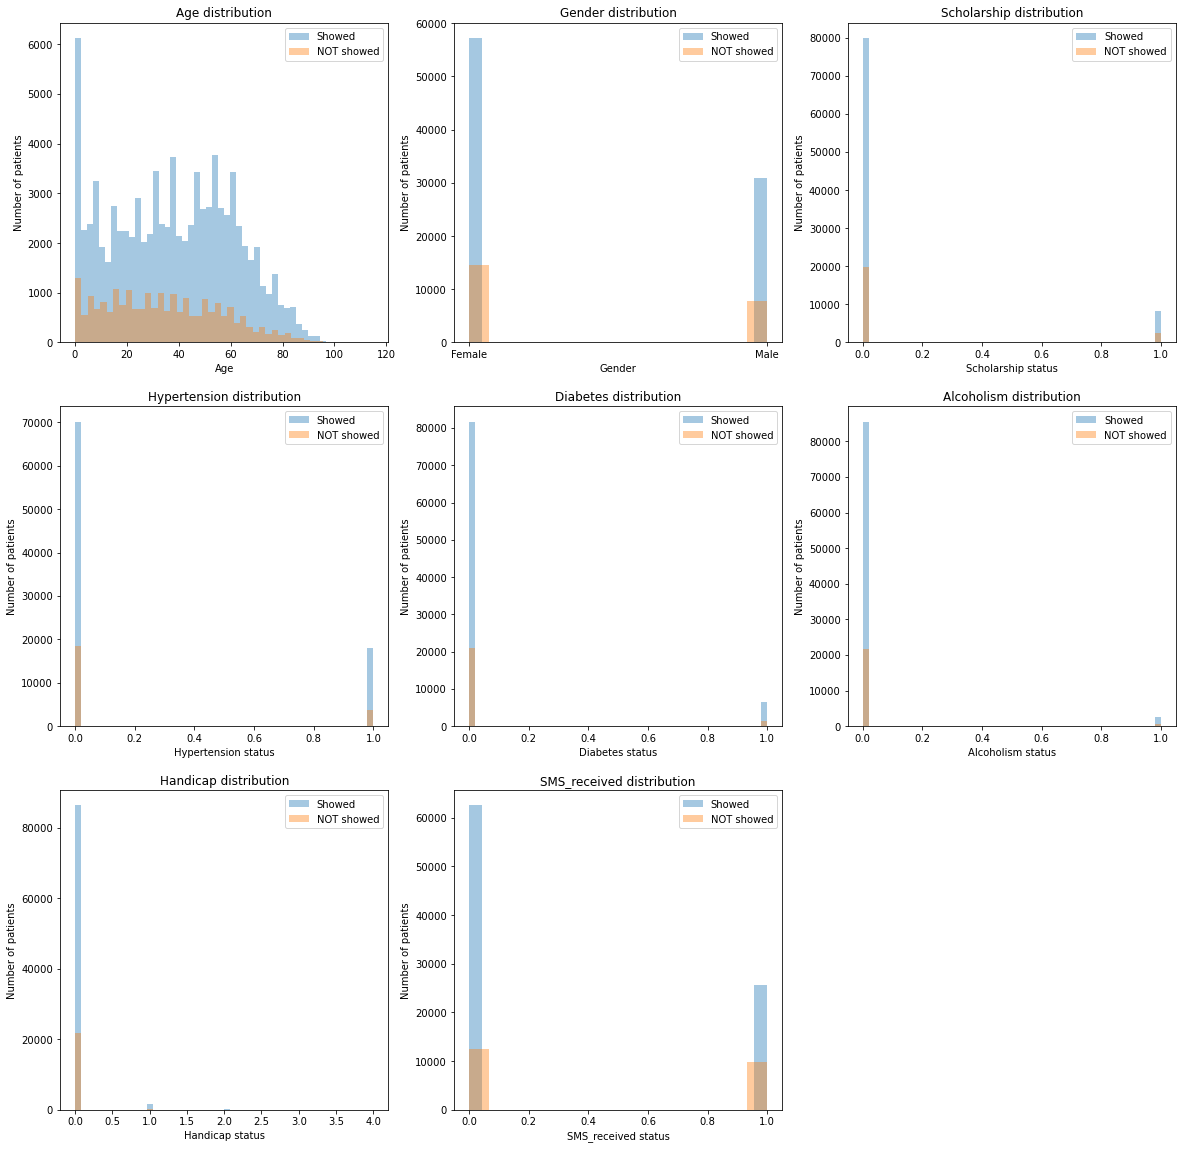

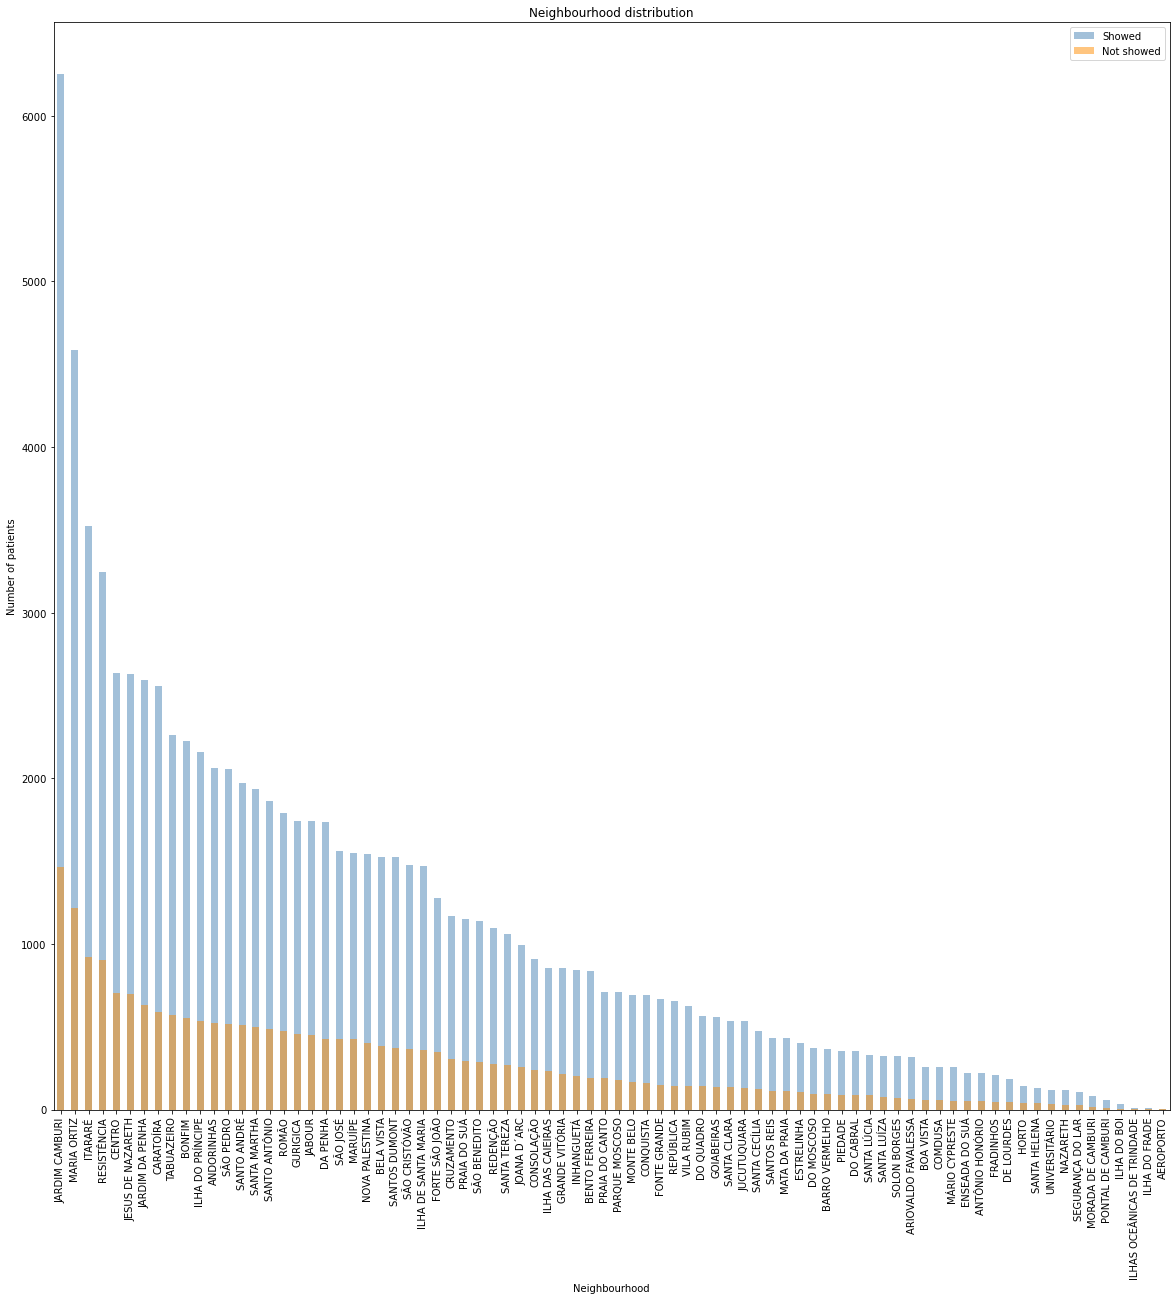

In [18]:
# Explore the dirstribution of different features of both datasets
plt.figure(figsize=(20,20))

# Define a function to plot 
def visualize(feature1, feature2):
    sns.distplot(feature1,label='Showed', norm_hist=False, kde=False)
    sns.distplot(feature2,label='NOT showed', norm_hist=False, kde=False)
    plt.legend()
    plt.ylabel('Number of patients');


# Age
plt.subplot(331)
visualize(show.Age,noshow.Age)
plt.title("Age distribution")
plt.xlabel('Age')

# Gender
plt.subplot(332)
ax1 =sns.distplot(show['Gender'].replace({'F':0,'M':1}), label='Showed', norm_hist=False, kde=False);
ax1.set_xticks(range(2))
ax1.set_xticklabels(["Female","Male"])

ax2 =sns.distplot(noshow['Gender'].replace({'F':0,'M':1}), label='NOT showed', norm_hist=False, kde=False);
ax2.set_xticks(range(2))
ax2.set_xticklabels(["Female","Male"])

plt.legend()
plt.title("Gender distribution")
plt.xlabel('Gender')
plt.ylabel('Number of patients');


# Scholarship
plt.subplot(333)
visualize(show.Scholarship,noshow.Scholarship)
plt.title("Scholarship distribution")
plt.xlabel('Scholarship status')


# Hypertension
plt.subplot(334)
visualize(show.Hypertension,noshow.Hypertension)
plt.title("Hypertension distribution")
plt.xlabel('Hypertension status')

# Diabetes
plt.subplot(335)
visualize(show.Diabetes,noshow.Diabetes)
plt.title("Diabetes distribution")
plt.xlabel('Diabetes status')


# Alcoholism
plt.subplot(336)
visualize(show.Alcoholism,noshow.Alcoholism)
plt.title("Alcoholism distribution")
plt.xlabel('Alcoholism status')

# Handicap
plt.subplot(337)
visualize(show.Handicap,noshow.Handicap)
plt.title("Handicap distribution")
plt.xlabel('Handicap status')


# SMS_received
plt.subplot(338)
visualize(show.SMS_received,noshow.SMS_received)
plt.title("SMS_received distribution")
plt.xlabel('SMS_received status')

plt.show()

# Neighbourhood
plt.figure(figsize=(20,20))
show['Neighbourhood'].value_counts().plot(kind='bar',label='Showed', color = 'steelblue', alpha= 0.5);
noshow['Neighbourhood'].value_counts().plot(kind='bar',label='Not showed', color = 'darkorange', alpha= 0.5);
plt.legend()
plt.title("Neighbourhood distribution")
plt.xlabel('Neighbourhood')
plt.ylabel('Number of patients');




>Number of patients across the distriubution ( or categories) of the features varies which might obscure getting insight into their relationship with the show-up rate. 

>Number of patients who showed and did not show are also unequal, comparing their distributions in terms of counts may not be ideal. 

>The solution is to normalize the counts. 



### Question 3. Is there a difference in the features distribution (or counts) between patients who showed and did not show after accounting for the difference in the number of counts?

/Users/ahmedbarakat/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/ahmedbarakat/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/ahmedbarakat/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level func

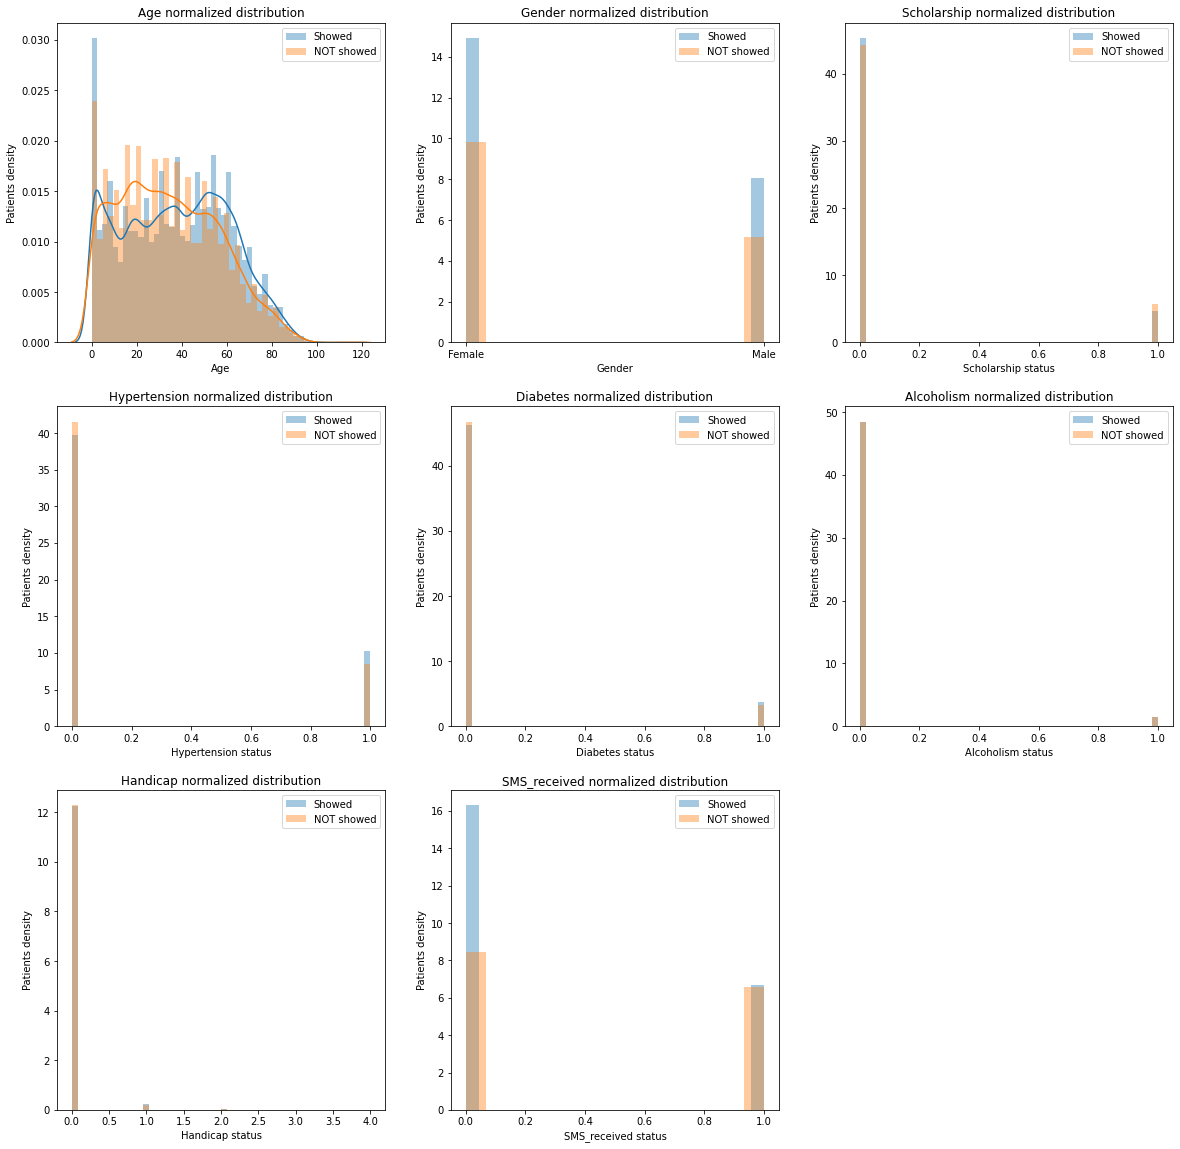

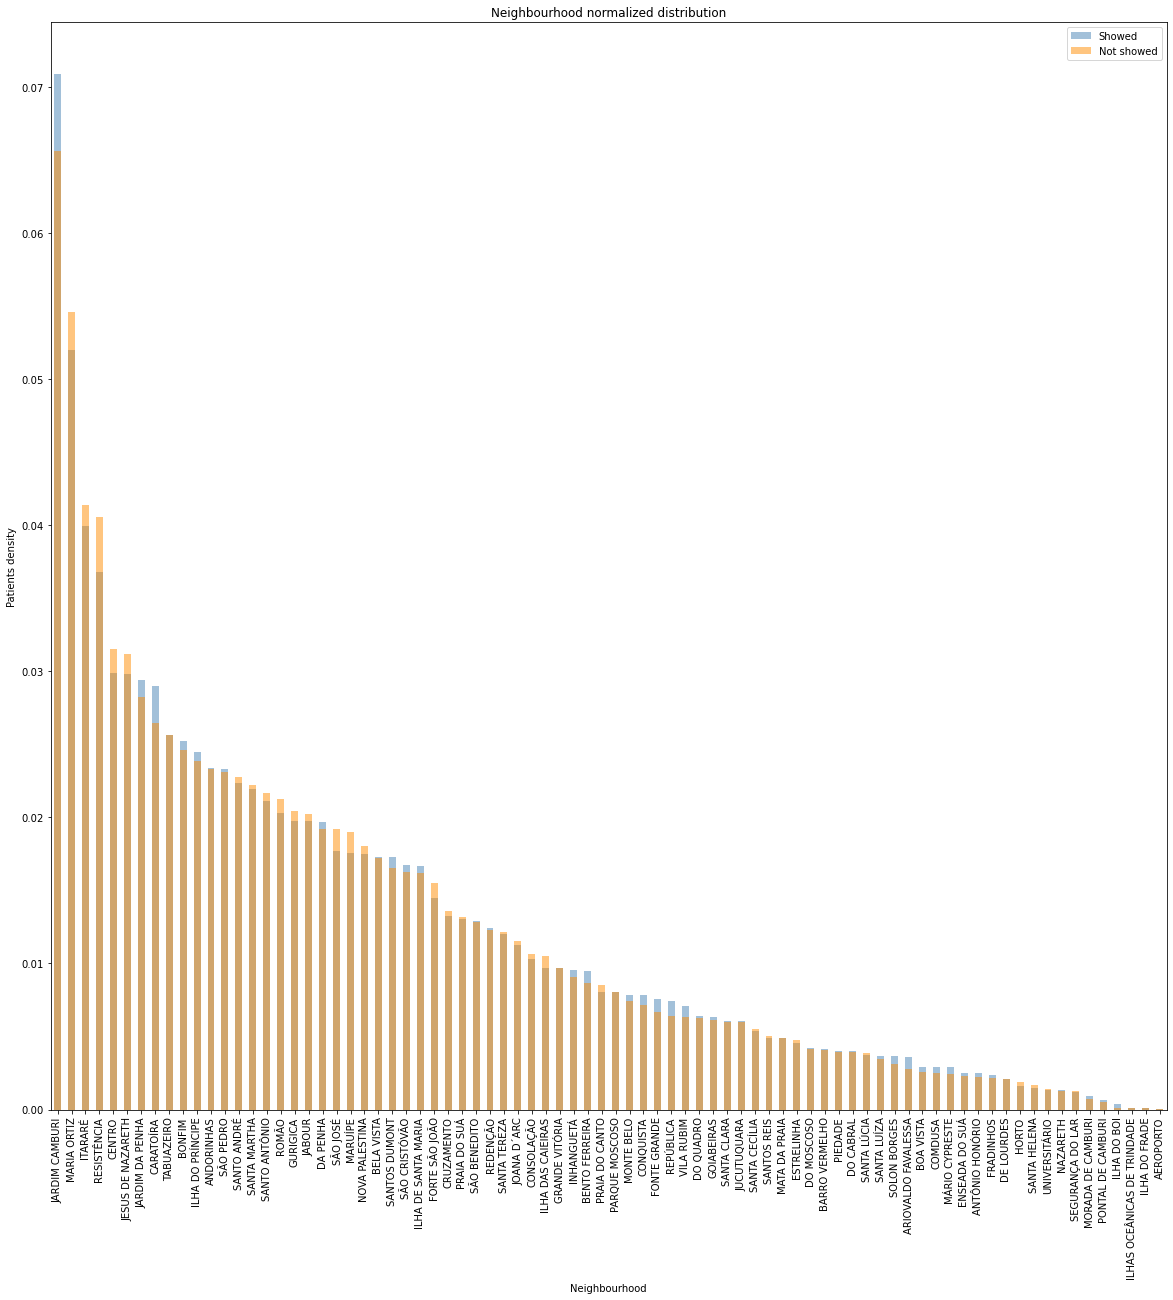

In [19]:
# Explore the dirstribution of different features of both datasets
plt.figure(figsize=(20,20))

# Define a function to plot 
def visualize(feature1, feature2):
    sns.distplot(feature1,label='Showed', norm_hist=True, kde=False)
    sns.distplot(feature2,label='NOT showed', norm_hist=True, kde=False)
    plt.legend()
    plt.ylabel('Patients density');

# Age
plt.subplot(331)
sns.distplot(show.Age,label='Showed', norm_hist=True, kde=True)
sns.distplot(noshow.Age,label='NOT showed', norm_hist=True, kde=True)
plt.legend()
plt.title("Age normalized distribution")
plt.xlabel('Age')
plt.ylabel('Patients density');

# Gender
plt.subplot(332)
ax1 =sns.distplot(show['Gender'].replace({'F':0,'M':1}), label='Showed', norm_hist=True, kde=False);
ax1.set_xticks(range(2))
ax1.set_xticklabels(["Female","Male"])

ax2 =sns.distplot(noshow['Gender'].replace({'F':0,'M':1}), label='NOT showed', norm_hist=True, kde=False);
ax2.set_xticks(range(2))
ax2.set_xticklabels(["Female","Male"])

plt.legend()
plt.title("Gender normalized distribution")
plt.xlabel('Gender')
plt.ylabel('Patients density');

# Scholarship
plt.subplot(333)
visualize(show.Scholarship,noshow.Scholarship)
plt.title("Scholarship normalized distribution")
plt.xlabel('Scholarship status')

# Hypertension
plt.subplot(334)
visualize(show.Hypertension,noshow.Hypertension)
plt.title("Hypertension normalized distribution")
plt.xlabel('Hypertension status')

# Diabetes
plt.subplot(335)
visualize(show.Diabetes,noshow.Diabetes)
plt.title("Diabetes normalized distribution")
plt.xlabel('Diabetes status')


# Alcoholism
plt.subplot(336)
visualize(show.Alcoholism,noshow.Alcoholism)
plt.title("Alcoholism normalized distribution")
plt.xlabel('Alcoholism status')

# Handicap
plt.subplot(337)
visualize(show.Handicap,noshow.Handicap)
plt.title("Handicap normalized distribution")
plt.xlabel('Handicap status')

# SMS_received
plt.subplot(338)
visualize(show.SMS_received,noshow.SMS_received)
plt.title("SMS_received normalized distribution")
plt.xlabel('SMS_received status')

plt.show()

# Neighbourhood
plt.figure(figsize=(20,20))
show['Neighbourhood'].value_counts(normalize=True).plot(kind='bar',label='Showed', color = 'steelblue', alpha= 0.5);
noshow['Neighbourhood'].value_counts(normalize=True).plot(kind='bar',label='Not showed', color = 'darkorange', alpha= 0.5);
plt.legend()
plt.title("Neighbourhood normalized distribution")
plt.xlabel('Neighbourhood')
plt.ylabel('Patients density');




>The previous plot shows that some features as age and diseases (hypertension and diabetes) could affect show-up rate.   

>Looking at the ratios between patients who showed and did not show could bring further insight. 

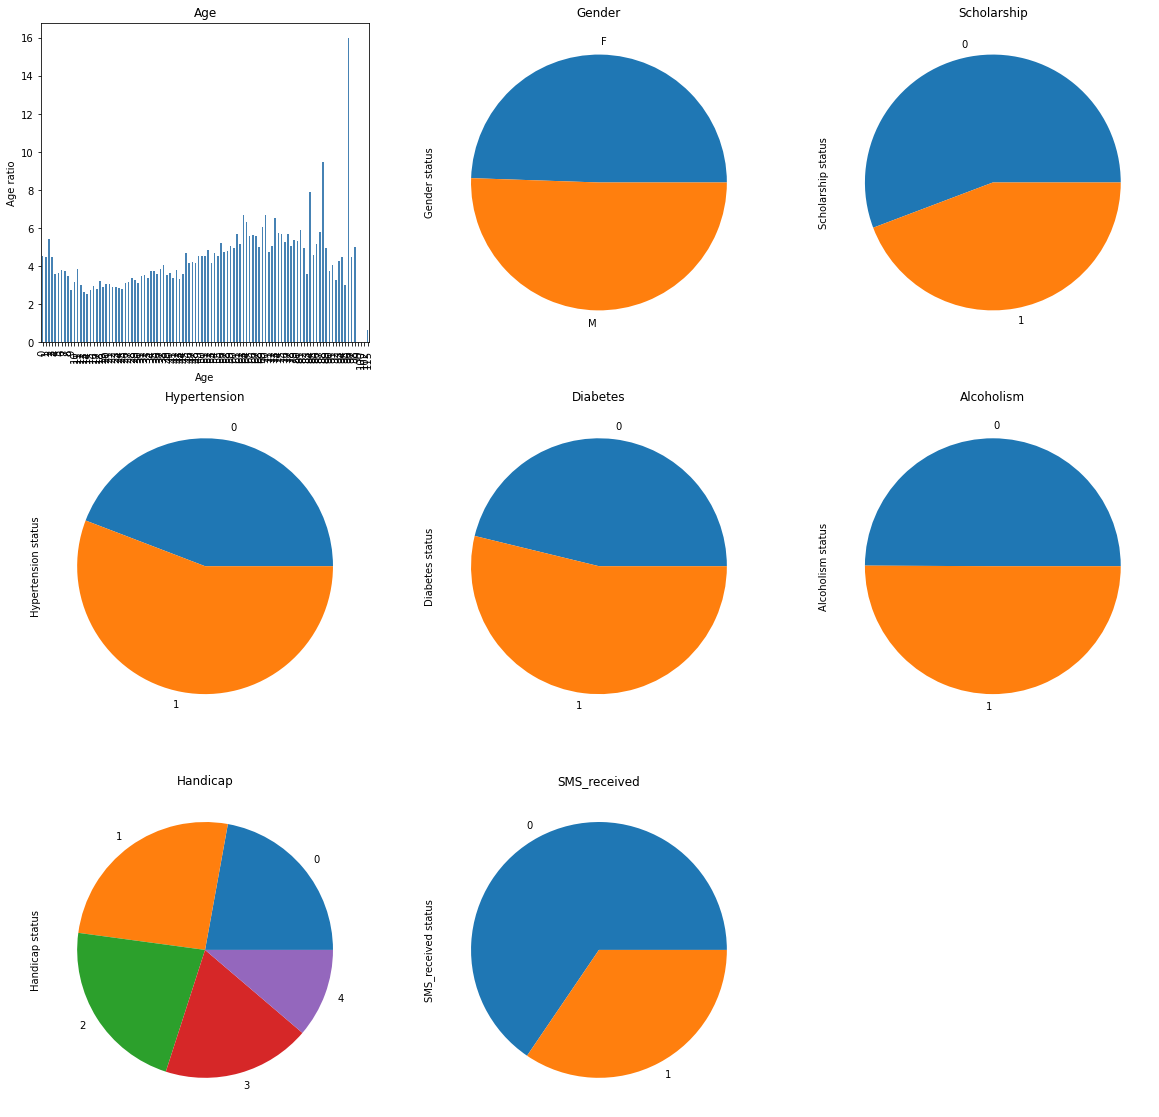

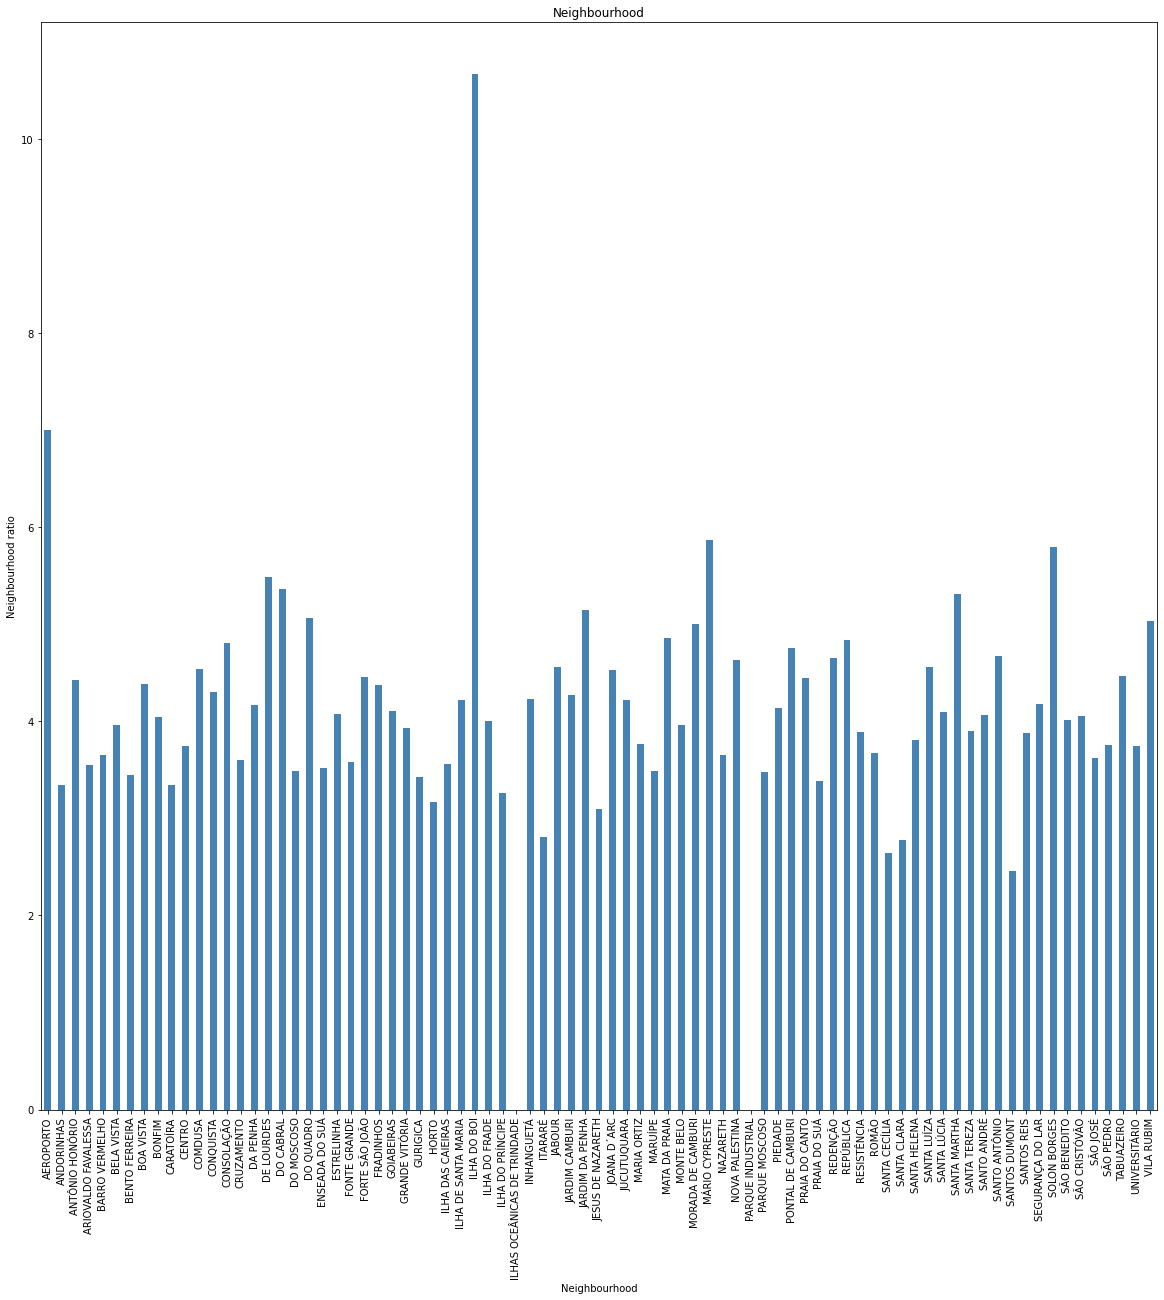

In [20]:
# Compare the ratios of patients who showed to those who did not show across different cattegories of the features 

plt.figure(figsize=(20,20))

# Age
plt.subplot(331)
age_ratio =show.groupby(['Age']).size()/noshow.groupby(['Age']).size()
age_ratio.plot(kind='bar',title='Age',color='steelblue');
plt.ylabel('Age ratio');

# Gender
plt.subplot(332)
gender_ratio =show.groupby(['Gender']).size()/noshow.groupby(['Gender']).size()
gender_ratio.plot(kind='pie',title='Gender')
plt.ylabel('Gender status');

# Scholarship
plt.subplot(333)
scholarship_ratio =show.groupby(['Scholarship']).size()/noshow.groupby(['Scholarship']).size()
scholarship_ratio.plot(kind='pie',title='Scholarship');
plt.ylabel('Scholarship status');


# Hypertension
plt.subplot(334)
hypertension_ratio =show.groupby(['Hypertension']).size()/noshow.groupby(['Hypertension']).size()
hypertension_ratio.plot(kind='pie',title='Hypertension');
plt.ylabel('Hypertension status');


# Diabetes
plt.subplot(335)
diabetes_ratio =show.groupby(['Diabetes']).size()/noshow.groupby(['Diabetes']).size()
diabetes_ratio.plot(kind='pie',title='Diabetes');
plt.ylabel('Diabetes status');


# Alcoholism
plt.subplot(336)
alcoholism_ratio =show.groupby(['Alcoholism']).size()/noshow.groupby(['Alcoholism']).size()
alcoholism_ratio.plot(kind='pie',title='Alcoholism');
plt.ylabel('Alcoholism status');


# Handicap
plt.subplot(337)
handicap_ratio =show.groupby(['Handicap']).size()/noshow.groupby(['Handicap']).size()
handicap_ratio.plot(kind='pie',title='Handicap')
plt.ylabel('Handicap status');


# SMS_received
plt.subplot(338)
SMS_received_ratio =show.groupby(['SMS_received']).size()/noshow.groupby(['SMS_received']).size()
SMS_received_ratio.plot(kind='pie',title='SMS_received')
plt.ylabel('SMS_received status');

plt.show()

# Neighbourhood
plt.figure(figsize=(20,20))

neighbourhood_ratio =show.groupby(['Neighbourhood']).size()/noshow.groupby(['Neighbourhood']).size()
neighbourhood_ratio.plot(kind='bar',title='Neighbourhood',color='steelblue');
plt.ylabel('Neighbourhood ratio');



>From the ratios plots we could see that there are some features that could influence the show up rate:
>- Age: It seems that middle age is associated with less show up rate compare to old and very young age.
>- Gender: It seems that gender difference does not affect much the attendance rate, though males tend to attend more.
>- Scholarship: People who are included in the scholarship program show less compared to those who are not. 
>- Hypertension: Hypertensive patients show up more compared to those who are not. 
>- Diabetes: Diabetic patients show up more compared to those who are not. 
>- Alcoholism: It does not seem that alcoholism affect attendance rate. 
>- Handicap: Patients with high degree of physical disability show less.
>- SMS_received: Patients who received sms reminder showed less.
>- Neighbourhood: There are some hospitals that are associated with less attendance rate compared to others e.g.,Santos Dumont. 

<a id='conclusions'></a>
## Conclusions

> From the analysis done in this notebook, a conclusion could be made that there are several factors that could affect the show-up rate as age and the disease status (hypertension, diabetes, and physical disability). However, there is also some counter-intuitive results as SMS_received status which requires further investigation. 
 

### Limitations
> One of the limitations of this analysis is that conclusions are based on descriptive statistics and not inferential ones. 



In [21]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

Traceback (most recent call last):
  File "/Users/ahmedbarakat/opt/anaconda3/lib/python3.9/runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/Users/ahmedbarakat/opt/anaconda3/lib/python3.9/runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "/Users/ahmedbarakat/opt/anaconda3/lib/python3.9/site-packages/nbconvert/__main__.py", line 2, in <module>
    main()
  File "/Users/ahmedbarakat/opt/anaconda3/lib/python3.9/site-packages/jupyter_core/application.py", line 264, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "/Users/ahmedbarakat/opt/anaconda3/lib/python3.9/site-packages/traitlets/config/application.py", line 846, in launch_instance
    app.start()
  File "/Users/ahmedbarakat/opt/anaconda3/lib/python3.9/site-packages/nbconvert/nbconvertapp.py", line 346, in start
    self.convert_notebooks()
  File "/Users/ahmedbarakat/opt/anaconda3/lib/python3.9/site-packages/nbconvert/n

1